# Проект 3

## Описание проекта


Запуск A/B-теста и анализ результатов (кумулятивный средний чек, кумулятивная выручка, кумулятивная конверсия, количество заказов на пользователя).

## Анализ A/B-теста

### Задача 
Проанализировать A/B-тест:
- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Примнять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Итак, импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_colwidth', None)

## Анализ A/B-теста

Посмотрим на датасеты

In [8]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'])
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
orders.duplicated().sum()

0

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'])
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.duplicated().sum()

0

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
display('Группы в ордерс {}'.format(orders['group'].unique()))
display('Группы в визиторс{}'.format(visitors['group'].unique()))
display('Дата начала группа А: {}'.format(orders[orders['group']=='A']['date'].min()))
display('Дата окончания группа А: {}'.format(orders[orders['group']=='A']['date'].max()))
display('Дата начала группа B: {}'.format(orders[orders['group']=='B']['date'].min()))
display('Дата окончания группа B: {}'.format(orders[orders['group']=='B']['date'].max()))
display('Количество пользователей в группе А: {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
display('Количество пользователей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))
display('Количество покупателей в группе А: {}'.format(orders[orders['group']=='A']['visitorId'].nunique()))
display('Количество покупателей в группе B: {}'.format(orders[orders['group']=='B']['visitorId'].nunique()))
display('Количество задвоенных покупателей: {}'.format(orders[orders['group']=='A']['visitorId']
                                                       .isin(orders[orders['group']=='B']['visitorId'])
                                                       .sum())) # не понимаю, что мне с этим делать. это много или мало?

"Группы в ордерс ['B' 'A']"

"Группы в визиторс['A' 'B']"

'Дата начала группа А: 2019-08-01 00:00:00'

'Дата окончания группа А: 2019-08-31 00:00:00'

'Дата начала группа B: 2019-08-01 00:00:00'

'Дата окончания группа B: 2019-08-31 00:00:00'

'Количество пользователей в группе А: 18736'

'Количество пользователей в группе B: 18916'

'Количество покупателей в группе А: 503'

'Количество покупателей в группе B: 586'

'Количество задвоенных покупателей: 89'

#### Чтобы построить графики, нужно собрать кумулятивные данные. 

In [20]:
datesGroups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

Соберём агрегированные кумулятивные по дням данные о заказах

In [21]:
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
.sort_values(by=['date','group'])
                   )
ordersAggregated.head(10)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


Аналогично получим агрегированные кумулятивные по дням данные о посетителях

In [22]:
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'})
                                        , axis=1).sort_values(by=['date','group'])
                     )
visitorsAggregated.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


Объединим обе таблицы в одну

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'], how='left')
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


#### Построим график кумулятивной выручки по группам.

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

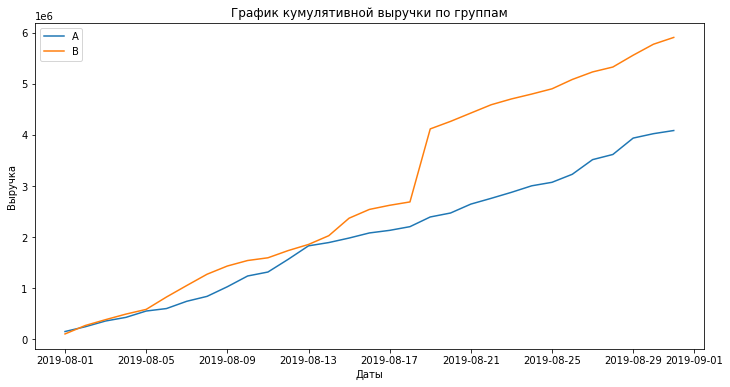

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title("График кумулятивной выручки по группам")
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.show()

На графике В есть точка, в которой он резко растет, это может сигнализировать об очень резком увеличении числа заказов или об очень дорогих заказах.

#### Построим график кумулятивного среднего чека по группам. 

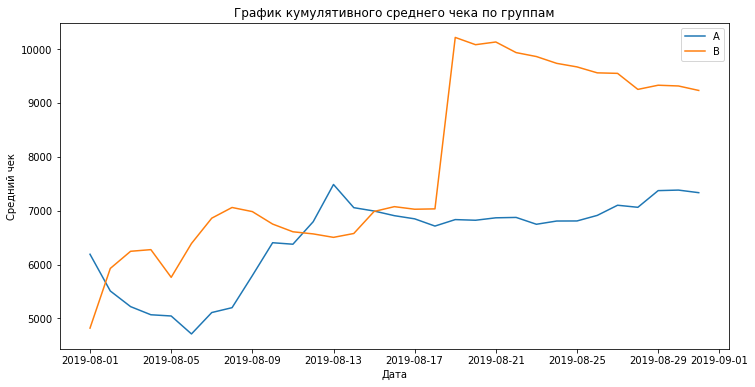

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Резкий всплеск на графике В говорит об аномально крупном заказе в группе В в середине августа.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

Для этого соберем данные в одной таблице.

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Далее строим график

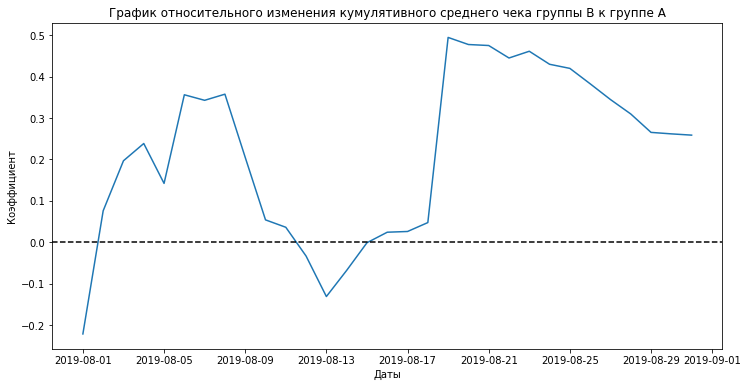

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])
         -1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel('Даты')
plt.ylabel('Коэффициент')
plt.show()

На графике видно как он резко скачет, возможно все-таки тут есть крупные заказы которые на это влияют.

#### Построим график кумулятивной конверсии по группам.

Для этого посчитаем кумулятивную конверсию посетителей в заказы и добавим ее в столбец conversion в датафрейм cumulativeData.

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

разделим данные по группам

In [30]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график

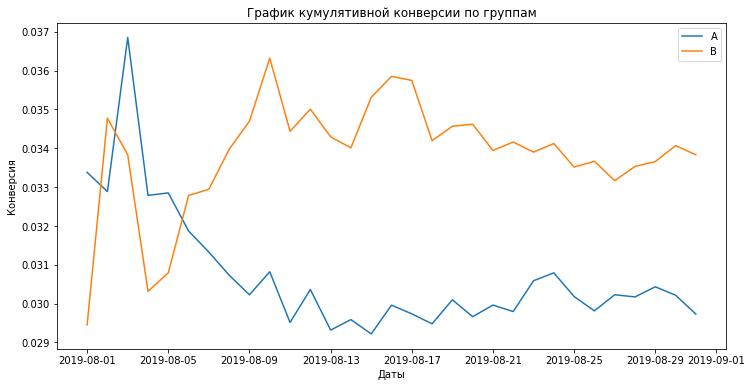

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивной конверсии по группам")
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.show()

на графике заметно как кумулятивная конверсия группы В в начале сильно вырвалась вперед, но затем можем наблюдать тенденцию к снижению, но при этом она все равно выше конверсии группы А, которая примерно с середины августа перешла в стадию увеличения.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

Для этого объединим датафреймы.

In [32]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], on='date', how='left', suffixes=['A', 'B'])
                              )
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Далее построим график.

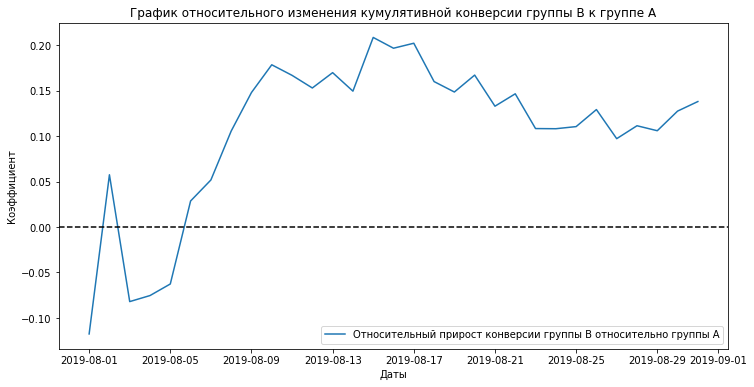

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
         , label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel('Даты')
plt.ylabel('Коэффициент')
plt.show()

В начале конверсию группы В сильно штормило, она то сильно проигрывала, то в одночасье вырывалась вперед, затем опять вниз, но затем с 6.08 сильно выросла, но это все может быть связано с аномалиями. на конец периода исследования конверсия группы В выше, чем группы А, но она окончательно не установилась еще.

#### Построим точечный график количества заказов по пользователям.

In [34]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


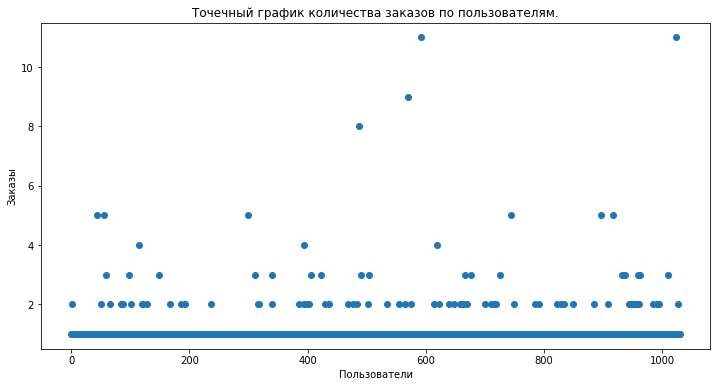

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Точечный график количества заказов по пользователям.")
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.show()

Абсолютное большинство покупателей делает только один заказ, хотя доля покупателей с двумя и тремя заказми тоже значительная. А считать их аномалиями или нет, нам поможет расчет перцентилей.

In [36]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Таким образом мы видим, что не более 5% покупателей сделали 2 и более покупки, и не более 1% - 4 и более. Таким образом, выбросами будем считать 4 и более покупки. 

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения. 

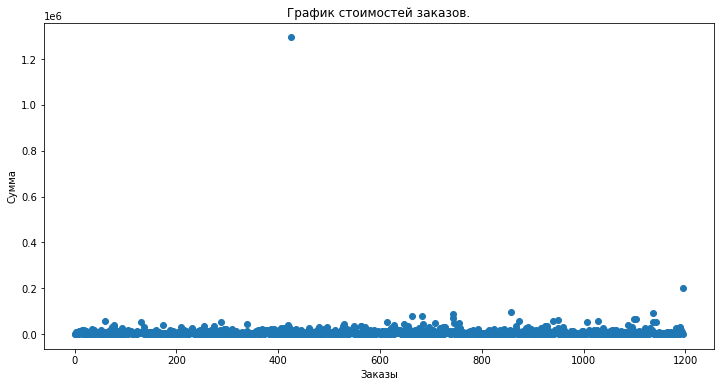

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов.")
plt.xlabel('Заказы')
plt.ylabel('Сумма')
plt.show()

На графике видно пару явных выбросов, но может быть их больше? На графике из-за масштаба сложно точно оценить, что есть выброс. Для этого посчитаем перцентили.

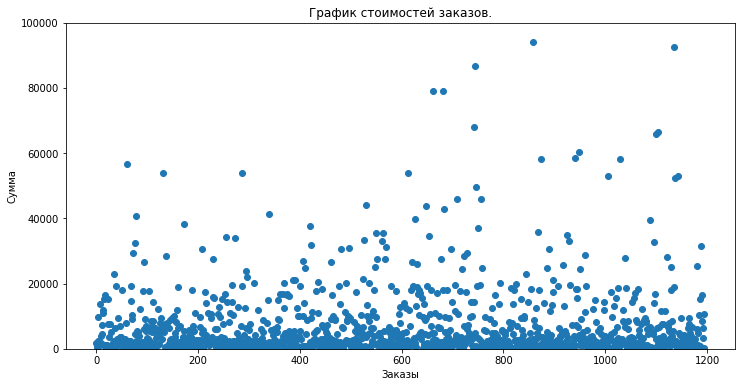

In [38]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов.")
plt.xlabel('Заказы')
plt.ylabel('Сумма')
plt.ylim((0,100000)) # немного масштабируем график
plt.show()

In [39]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% покупателей сделали заказ на сумму 28000 и выше, и не более 1% - на 58233 и выше, таким образом за выбросы будем считать 1% дорогих заказов.

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Для этого соберем данные в одну таблицу, где будут как данные за день, так и кумулятивные данные на эту дату.
Сначала посчитаем и соберем данные о визитах.

In [40]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

display(visitorsADaily.head())
display(visitorsACummulative.head())

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [41]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

display(visitorsBDaily.head())
display(visitorsBCummulative.head())

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Теперь проделаем то же с заказами.

In [42]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date' , 'ordersCummulativeA' , 'revenueCummulativeA']

display(ordersADaily.head())
display(ordersACummulative.head())

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [43]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date' , 'ordersCummulativeB' , 'revenueCummulativeB']

display(ordersBDaily.head())
display(ordersBCummulative.head())

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Теперь объединим данные в одну таблицу.

In [44]:
data = (
    ordersADaily.merge(ordersBDaily, on='date', how='left')
    .merge(ordersACummulative, on='date', how='left')
    .merge(ordersBCummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
    .merge(visitorsACummulative, on='date', how='left')
    .merge(visitorsBCummulative, on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

display(ordersByUsersA.head())
display(ordersByUsersB.head())

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [46]:
sampleA = (pd.concat([ordersByUsersA['orders']
                      ,pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']))
                                 , name='orders')]
                     ,axis=0)
          )

sampleB = (pd.concat([ordersByUsersB['orders']
                      ,pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders']))
                                 , name='orders')]
                     ,axis=0)
          ) 

display(sampleA)
display(sampleB)

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

#### Гипотезы:
- Нулевая гипотеза: конверсия групп А и В не отличается
- Альтернативная гипотеза: конверсия групп А и В отличается

In [47]:
print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы В: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост конверсии группы В: 0.138


p-value = 0.017, что меньше чем .05, значит нулевую гипотезу о том, что различий в среднем количестве заказов групп А и В нет, отвергаем. Относительный выигрыш группы B равен 13.8% 

#### Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

#### Гипотезы:
- Нулевая гипотеза: средний чек групп А и В не отличается
- Альтернативная гипотеза: средний чек групп А и В отличается

In [48]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue']
                                          , orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы В: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()
                                                              /orders[orders['group']=='A']['revenue'].mean() - 1))

p-value: 0.729
Относительный прирост среднего чека группы В: 0.259


p-value = 0.729, что значительно выше .05, значит у нас нет оснований отвергать нулевую гипотезу о том, что различий в среднем чеке заказа групп нет. Хотя средний чек группы В значительно выше среднего чека группы А, но возможно на это число значительное влияние имеют выбросы.

#### Теперь посмотрим на очищенные данные.
Для этого создадим таблицу с аномальными пользователями.

In [49]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
15


Всего 15 аномальных пользователей.

#### Посчитаем статистическую значимость различий в конверсии между группами по очищенным данным.

Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [50]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
    , axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')]
    , axis=0) 

#### Гипотезы:
- Нулевая гипотеза: конверсия групп А и В не отличается
- Альтернативная гипотеза: конверсия групп А и В отличается

In [51]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы В:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.014
Относительный прирост конверсии группы В:0.153


Результат по среднему количеству заказов практически не изменился, разве что выйгрыш группы В вырос по сравнению с сырыми данными с 13.8% до 15.3%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

#### Гипотезы:
- Нулевая гипотеза: средний чек групп А и В не отличается
- Альтернативная гипотеза: средний чек групп А и В отличается

In [52]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                        orders[np.logical_and(orders['group'] == 'B',
                        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Относительный прирост среднего чека группы В: {0:.3f}'
      .format(orders[np.logical_and(orders['group'] == 'B',
             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
             / orders[np.logical_and(orders['group'] == 'A',
             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()
             - 1)) 

p-value: 0.851
Относительный прирост среднего чека группы В: -0.006


P-value увеличился, но и разница между сегментами сократилась с 25.9% до 0.6%, только теперь в пользу группы А.

## Выводы:
- Есть статистически значимое различие в конверсии между группами. По очищенным данным, относительная разница в конверсии составила 15.3%
- После фильтрации аномалий установили, что нет статистически значимого различия в размере среднего чека между группами
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы А и на конец исследования разница составляет 15.3%


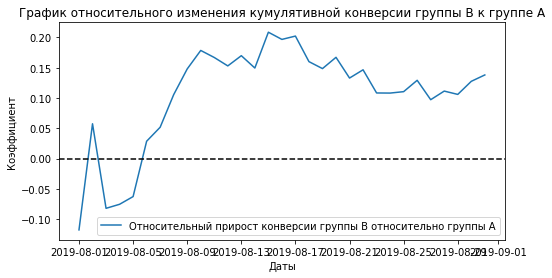

In [53]:
plt.figure(figsize=(8, 4))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
         , label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel('Даты')
plt.ylabel('Коэффициент')
plt.show()

- График относительного среднего чека постоянно скачет, по нему сложно делать какие-либо точные выводы. Но можно заметить, что после аномального всплеска в середине наблюдения, он имеет тенденцию к снижению. Что и показал анализ очищенных данных.

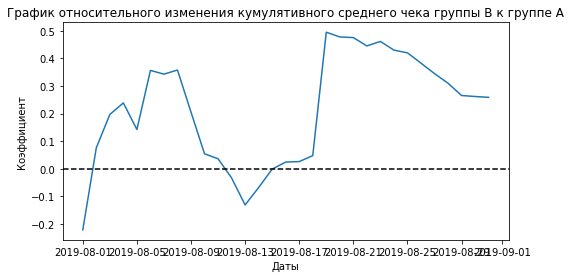

In [54]:
plt.figure(figsize=(8, 4))
plt.plot(mergedCumulativeRevenue['date']
         , (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])
         -1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel('Даты')
plt.ylabel('Коэффициент')
plt.show()

#### Исходя из полученных данных, я бы закончил тест и признал его успешным, хотя и средний чек между группами не имеет статистически значимого различия, но вот конверсия имеет статистически значимую разницу, с относительной разницей в 15.3% в пользу группы В.